<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/FraudNoFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df = df.sample(frac = 1, random_state=1)
df = df.reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [ ]:
as_np = df.to_numpy()
index = int(len(as_np)* .92)
X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((262022, 30), (262022,)), ((22785, 30), (22785,)))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test[0]

array([ 0.14097956,  0.53955733, -1.15153973, -0.47041404,  0.57191953,
       -0.85362208, -0.27419086, -0.03159233, -0.25697594,  2.43387034,
       -0.75622807, -0.03956163, -1.77401948,  2.41251471,  1.26340856,
       -0.24099657,  0.16722599,  0.24463032,  0.56588687, -0.53397987,
        1.02654979,  0.4423462 ,  0.47928779, -0.49696321, -0.14435544,
       -0.64466426,  0.08065479, -0.24695714,  0.11458447,  1.64640304])

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
test_predictions = model.predict(X_test)

pd.value_counts(test_predictions)

0.0    22757
1.0       28
dtype: int64

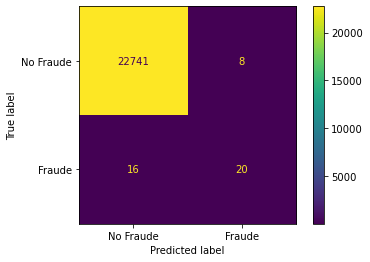

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraude', 'Fraude'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()
s="""
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn,fp,fn,tp)

print(s)


True Negatives: 22741
False Positives: 8
False Negatives: 16
True Positives: 20



In [ ]:
def accuracy(tn, fp, fn, tp):
    return (tp+tn)/(tp+tn+fp+fn)

print("Accuracy: {0}".format(accuracy(tn,fp,fn,tp)))

Accuracy: 0.9989466754443713


In [ ]:
#Recall = Sensitivity = True Positive Rate
def recall(tn, fp, fn, tp):
    return (tp)/(tp+fn)

print("Recall: {0}".format(recall(tn,fp,fn,tp)))

Recall: 0.5555555555555556


In [ ]:
#False Negative Rate
def fnr(tn, fp, fn, tp):
    return (fn)/(tp+fn)

print("FNR: {0}".format(fnr(tn,fp,fn,tp)))

FNR: 0.4444444444444444


In [ ]:
#Specificity = True Negative Rate
def tnr(tn, fp, fn, tp):
    return (tn)/(tn+fp)

print("TNR: {0}".format(tnr(tn,fp,fn,tp)))

TNR: 0.9996483361906018


In [ ]:
#False Positive Rate
def fpr(tn, fp, fn, tp):
    return (fp)/(tn+fp)

print("FPR: {0}".format(fpr(tn,fp,fn,tp)))

FPR: 0.00035166380939821533


In [ ]:
#Precision = Positive Predictive Value
def precision(tn, fp, fn, tp):
    return (tp)/(tp+fp)

print("Precision: {0}".format(precision(tn,fp,fn,tp)))

Precision: 0.7142857142857143


In [ ]:
#Negative predicted Value

def npv(tn, fp, fn, tp):
    return (tn)/(tn+fn)

print("NPV: {0}".format(npv(tn,fp,fn,tp)))

NPV: 0.9992969196291251


In [ ]:
#Balanced Accuracy

def balanced_accuracy(tn, fp, fn, tp):
    tprr = recall(tn,fp,fn,tp)
    tnrr = tnr(tn,fp,fn,tp)
    return (tprr+tnrr)/2

print("Balanced accuracy: {0}".format(balanced_accuracy(tn,fp,fn,tp)))

Balanced accuracy: 0.7776019458730787


In [ ]:
#F1 Score
def f1(tn, fp, fn, tp):
    p = precision(tn,fp,fn,tp)
    r = recall(tn,fp,fn,tp)
    return (2*p*r)/(p+r)

print("F1_score: {0}".format(f1(tn,fp,fn,tp)))

F1_score: 0.6250000000000001


In [ ]:
propabilities = model.predict_proba(X_test)[:, 1]
propabilities > 0.5


array([False, False, False, ..., False, False, False])

In [ ]:
pd.value_counts(propabilities > 0.5)

False    22757
True        28
dtype: int64

In [ ]:
import numpy as np
thresholds = np.linspace(0,1, num = 2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
all_prediction = np.array([(propabilities > t).astype(int) for t in thresholds])
all_prediction.shape

(2000, 22785)

In [ ]:
pd.value_counts(all_prediction[500])

0    22748
1       37
dtype: int64

In [ ]:
confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_prediction]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [recall(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
import plotly.express as px
px.scatter(x=fprs, y= tprs, color=thresholds,labels=dict(x='False Positive Rate', y = 'True Positive Rate', color = 'Threshold'), title='Roc Curve')

In [ ]:
from sklearn.metrics import auc 
auc(fprs, tprs)


0.9810064911278153

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions, labels = [0,1], target_names=['Not fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not fraud       1.00      1.00      1.00     22749
       Fraud       0.71      0.56      0.63        36

    accuracy                           1.00     22785
   macro avg       0.86      0.78      0.81     22785
weighted avg       1.00      1.00      1.00     22785

